In [2]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip",sep=';',header=0,low_memory=False,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0


In [3]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [4]:
df.fillna(method='ffill',inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [5]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
df.replace('?' ,'nan',inplace=True)

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
value=df.values.astype('float32')
value

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      dtype=float32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [11]:
#this is called the remaining active power
df['Sub_metering_4']=(value[:,0]*1000/60-(value[:,4]+value[:,5]+value[:,6]))
df.Sub_metering_4

datetime
2006-12-16 17:24:00    52.266670
2006-12-16 17:25:00    72.333336
2006-12-16 17:26:00    70.566666
2006-12-16 17:27:00    71.800003
2006-12-16 17:28:00    43.099998
                         ...    
2010-11-26 20:58:00    15.766666
2010-11-26 20:59:00    15.733334
2010-11-26 21:00:00    15.633333
2010-11-26 21:01:00    15.566667
2010-11-26 21:02:00    15.533334
Name: Sub_metering_4, Length: 2075259, dtype: float32

In [12]:
df.to_csv(r'C:\Users\Humphery\Downloads\household_power_consumption.zip.csv')
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.099998
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0,15.766666
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0,15.733334
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0,15.633333


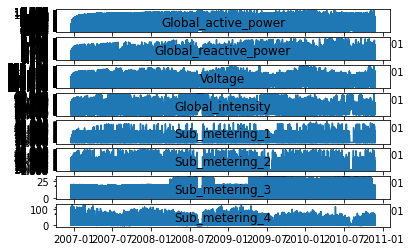

In [13]:
# line plot
import matplotlib.pyplot as plt
plt.figure()
for i in range(len(df.columns)):
    plt.subplot(len(df.columns),1,i+1)
    name=df.columns[i] 
    plt.plot(df[name])
    plt.title(name,y=0)
plt.show() 

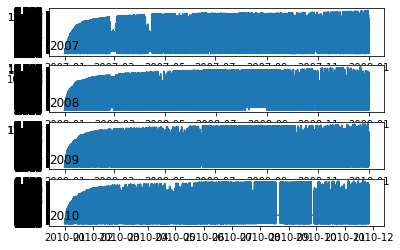

In [15]:
#yearly line 
from pandas import read_csv   
import matplotlib.pyplot as plt


years=['2007','2008','2009','2010']
plt.figure()
for i in range(len(years)):
    plt.subplot(len(years),1,i+1)
    year=years[i]
    result=df[str(year)]
    plt.plot(result['Global_active_power'])
    plt.title(str(year),y=0,loc='left')
plt.show()

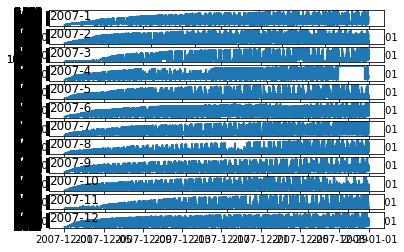

In [16]:
#monthly line plot
from pandas import read_csv
import  matplotlib.pyplot as plt

months=[x for x in range(1,13)]
plt.figure()
for i in range(len(months)):
    ax=plt.subplot(len(months),1,i+1)
    month='2007-'+str(months[i])
    result=df[month]
    plt.plot(result['Global_active_power'])
    plt.title(month,y=0,loc='left')
plt.show() 

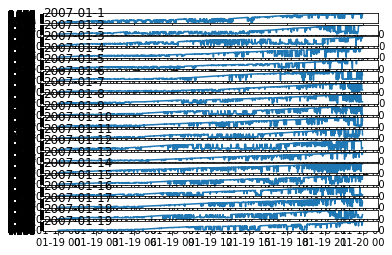

In [17]:
#daily line plot
from pandas import read_csv
import matplotlib.pyplot as plt

days=[x for x in range(1,20)]
plt.figure()
for i in range(len(days)):
    ax=plt.subplot(len(days),1,i+1)
    day='2007-01-'+str(days[i])
    result=df[day]
    plt.plot(result['Global_active_power'])
    plt.title(day,y=0,loc='left')
plt.show()

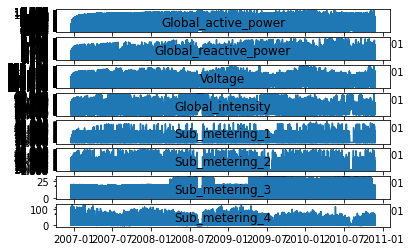

In [22]:
#line graph
import matplotlib.pyplot as plt
for i in range(len(df.columns)):
    plt.subplot(len(df.columns),1,1+i)
    name=df.columns[i]
    plt.plot(df[name])
    plt.title(name,y=0)
plt.show()